In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Linear Regression

#### Preparing data

In [4]:
np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

data_1 = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})

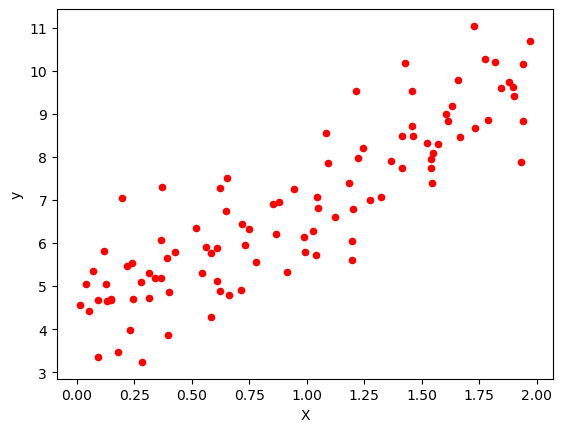

In [5]:
data_1.plot(kind="scatter" , x = 'X' , y = 'y' , color="red")
plt.show()

#### Train/Test Data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(data_1['X']), data_1['y'], test_size=0.2, random_state=42)

#### Creating the linear regression model

In [7]:
linear_regression_model = LinearRegression()

linear_regression_model.fit( X = X_train , y = y_train)

print(linear_regression_model.intercept_ , linear_regression_model.coef_)

4.142913319458566 [2.79932366]


The linear regression equation would be ' y = 4.14 + (2.79 * x) '

#### Making preditions

In [8]:
y_pred = linear_regression_model.predict(X_test)

#### Eveluating (R-Squared)

In [9]:
r2  = r2_score(y_test , y_pred)

print(f'R-squared: {r2}')

R-squared: 0.8072059636181392


#### Eveluating (mean squared error (MSE))

In [10]:
mse = (mean_squared_error(y_test, y_pred))

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.6536995137170021


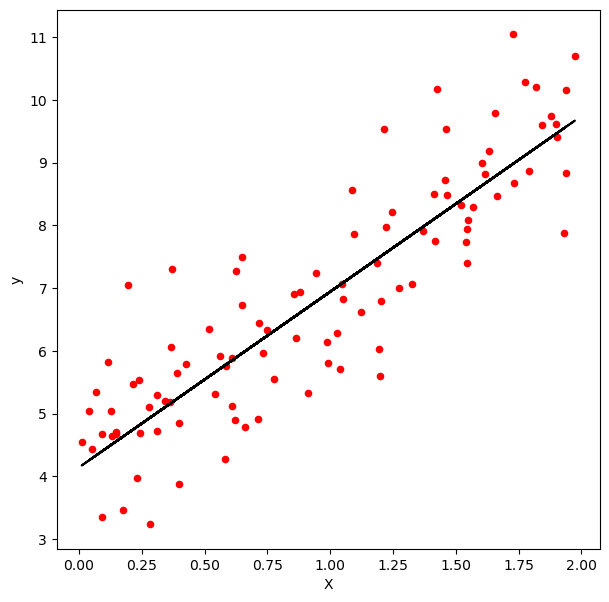

In [11]:
data_1.plot(kind="scatter" , x = 'X' , y = 'y' , color="red" , figsize=(7,7))
plt.plot( data_1['X'],
          linear_regression_model.predict(pd.DataFrame(data_1['X'])),
          color="black"
        )
plt.show()

# Polynomial Regression

#### Preparing data

In [12]:
n_samples = 100

X = np.sort(5 * np.random.rand(n_samples, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, n_samples)

data_2 = pd.DataFrame({'a': X.flatten(), 'b': y})

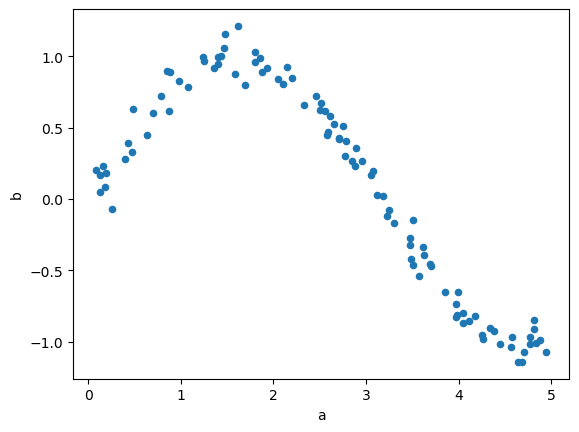

In [13]:
data_2.plot(kind="scatter" , x = 'a' , y='b')
plt.show()

In [14]:
# Train/Test data

X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(data_2['a']), data_2['b'], test_size=0.2, random_state=42)

# Implementing the polynomial regression model

poly = PolynomialFeatures(degree=3)

X_train_poly = poly.fit_transform(X_train)

X_test_poly  = poly.fit_transform(X_test)

poly_regression_model = LinearRegression()

# Training the model

poly_regression_model.fit(X_train_poly , y_train)

# Making predictions

y_pred = poly_regression_model.predict(X_test_poly)


# Evaluation

mse = mean_squared_error(y_test , y_pred)
r2  = r2_score(y_test , y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.014069502427957969
R-squared: 0.9725400943209166


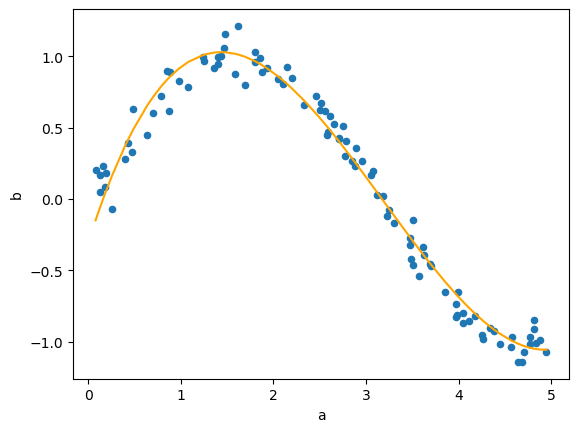

In [15]:
data_2.plot(kind="scatter" , x = 'a' , y='b')
plt.plot( data_2['a'],
        poly_regression_model.predict(poly.fit_transform(pd.DataFrame(data_2['a']))),
         color="orange"
        )
plt.show()

# Multiple Simple Regression

#### Prepare the data

In [16]:
n_samples = 100

X1 = np.random.rand(n_samples)
X2 = np.random.rand(n_samples)

y = 2 * X1 + 3 * X2 + np.random.normal(0, 0.5, n_samples)

data_3 = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})

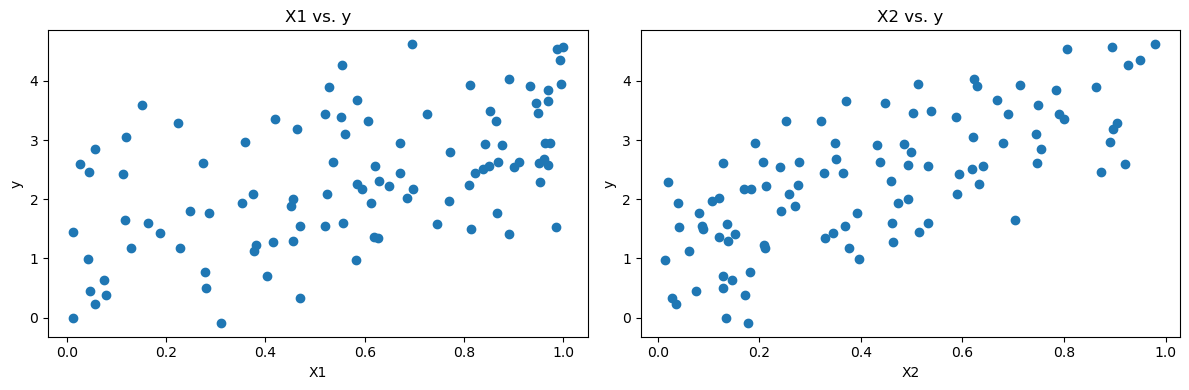

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(data_3['X1'], data_3['y'])
plt.title('X1 vs. y')
plt.xlabel('X1')
plt.ylabel('y')

# Scatter plot for X2 vs. y
plt.subplot(1, 2, 2)
plt.scatter(data_3['X2'], data_3['y'])
plt.title('X2 vs. y')
plt.xlabel('X2')
plt.ylabel('y')

plt.tight_layout()
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(data_3[['X1','X2']]), data_3['y'], test_size=0.2, random_state=42)

multi_lin_reg_model = LinearRegression()

multi_lin_reg_model.fit(X_train , y_train)

y_pred = multi_lin_reg_model.predict( X_test )

mse = mean_squared_error(y_test , y_pred)
r2  = r2_score(y_test , y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.3248996665104276
R-squared: 0.7350106326222281


In [19]:
X_train

,X1,X2
55,0.418243,0.799410
88,0.618128,0.119762
26,0.454541,0.492618
42,0.974395,0.192289
69,0.468693,0.368914
...,...,...
60,0.376463,0.061078
71,0.273407,0.747471
14,0.012154,0.513989
92,0.520308,0.789171


#  Binary Logistic Regression

### Single independent variable

#### Preparing data

In [20]:
n_samples = 200
X = np.random.rand(n_samples) * 10
y = (X + np.random.normal(scale=2, size=n_samples)) > 5

data_4 = pd.DataFrame({'X': X, 'y': y})

#### Splitting data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(data_4['X']), y, test_size=0.25, random_state=15)

##### Creating the model

In [22]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(random_state=15)

logistic_reg.fit(X_train, y_train)

LogisticRegression(random_state=15)

#### Making the predictions

In [23]:
y_pred = logistic_reg.predict(X_test)

#### Evaluating using confusion matrix

In [24]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[19,  4],
       [ 5, 22]], dtype=int64)

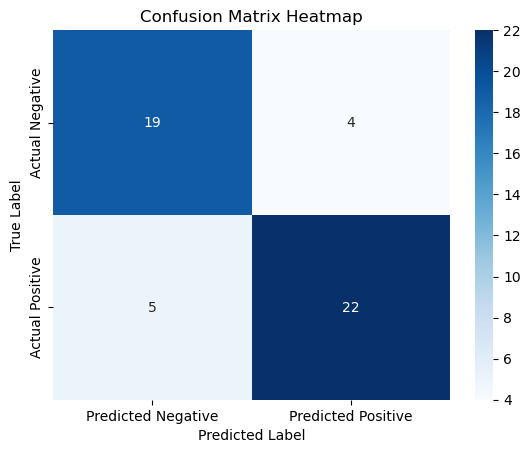

In [25]:
sns.heatmap(cnf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')

# Display the plot
plt.show()

In [26]:
target_names = ['Negative', 'Positive']

classification_rep = metrics.classification_report(y_test, y_pred, target_names=target_names)

In [27]:
print(classification_rep)

              precision    recall  f1-score   support

    Negative       0.79      0.83      0.81        23
    Positive       0.85      0.81      0.83        27

    accuracy                           0.82        50
   macro avg       0.82      0.82      0.82        50
weighted avg       0.82      0.82      0.82        50



#### Coefficient and probability in logistic regression

In [28]:
print( np.exp(logistic_reg.coef_) )

[[2.31810854]]


With every one-unit rise in X, the likelihood of y being 1 increases by a factor of 2.39. Addressing the query: What is the probability that X falls into the positive class if X is 2.563?

In [29]:
log_odds = logistic_reg.coef_ * 2.563 + logistic_reg.intercept_

odds = np.exp(log_odds)

prob = odds / (1+odds)

print(prob)

[[0.16556126]]
